### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [5]:
!pip install tensorflow==2.0

  Using cached https://files.pythonhosted.org/packages/d3/af/296748d4c8d8987423231b93aecce5ab5952f6f2243cb6cedb88dd425397/tensorflow-2.0.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/b8/88def36e74bee9fce511c9519571f4e485e890093ab7442284f4ffaef60b/google_auth_oauthlib-0.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1a/70/1935c770cb3be6e3a8b78ced23d7e0f3b187f5cbfab4749523ed65d7c9b1/requests-2.23.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/e5/38518af393f7c214357079ce67a317307936896e961e35450b70fad2a9cf/rsa-4.0-py2.py3-none-any.whl
  Using cached https://files.pyt

distributed 1.21.8 requires msgpack, which is not installed.
tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.23.0 which is incompatible.
tensorboard 2.0.2 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
google-auth 1.13.1 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf

C:\Users\arany\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\arany\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\arany\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\arany\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
import tensorflow as tf
tf.set_random_seed(42)

In [3]:
tf.__version__

'1.13.1'

In [69]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [7]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
trainY_ohe=tf.keras.utils.to_categorical(trainY,10)

In [9]:
testY_ohe=tf.keras.utils.to_categorical(testY,10)

In [10]:
print(trainY_ohe.shape)
print('First 5 examples now are: ', trainY_ohe[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
print(trainX.shape)

(60000, 28, 28)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

[9 0 0 3 0 2 7 2 5 5]


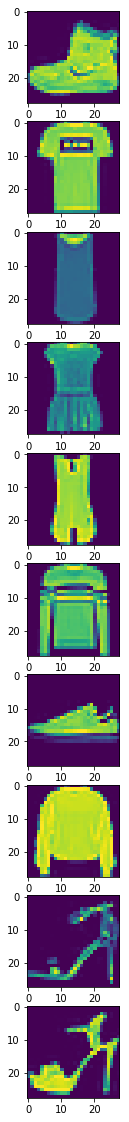

In [15]:
fig, axes = plt.subplots(10, figsize=(20,20))

for i,ax in enumerate(axes.flat):
    ax.imshow(trainX[i])
    
print(trainY[0:10,])

9


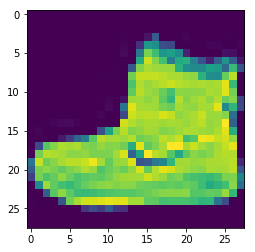

In [13]:
plt.imshow(trainX[0,:,:],cmap=None)
print(trainY[0])

In [16]:
trn_Y=pd.DataFrame(trainY)
trn_Y[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

In [30]:
#Represent Training & Testing samples suitable for #tensorflow backend
X_train=trainX.reshape(trainX.shape[0],784).astype('float32')
X_test=testX.reshape(testX.shape[0],784).astype('float32')

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [31]:
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.fit_transform(X_test)

In [32]:
X_train_mm_df = pd.DataFrame(X_train_mm)

In [34]:
X_train_mm_df.shape

(60000, 784)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [37]:
# Initialize the constructor

model = Sequential()

In [40]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [46]:
model.fit(X_train_mm, trainY_ohe, epochs=15, verbose=1,batch_size=256 )

Epoch 1/15
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2193 - acc: 0.9232
Epoch 2/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2186 - acc: 0.92271s - 
Epoch 3/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2176 - acc: 0.9242
Epoch 4/15
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2165 - acc: 0.9243
Epoch 5/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2157 - acc: 0.9246
Epoch 6/15
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2147 - acc: 0.9250
Epoch 7/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2136 - acc: 0.9257
Epoch 8/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2132 - acc: 0.9252
Epoch 9/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2123 - acc: 0.9260
Epoch 10/15
60000/60000 [==============================] - 5s 80us/sample - l

In [64]:
loss, acc = model.evaluate(X_test_mm, testY_ohe, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.885
Loss: 0.319


In [132]:
y_predict = model.predict(X_test_mm)

In [133]:
y_predict[0]

array([8.6368300e-06, 1.5490625e-06, 2.4762508e-05, 1.2301884e-05,
       8.5186912e-06, 3.9454470e-03, 6.7675242e-06, 1.3643060e-02,
       6.4042112e-04, 9.8170853e-01], dtype=float32)

In [134]:
np.argmax(y_predict[0])

9

In [135]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))


In [136]:
cm = metrics.confusion_matrix(testY,y_pred)
print(cm)

[[888   0  15  21   3   1  64   0   8   0]
 [  3 970   0  22   2   0   3   0   0   0]
 [ 24   0 833  15  77   0  47   1   3   0]
 [ 27   5  13 911  23   0  17   0   4   0]
 [  0   1 111  40 798   0  47   0   3   0]
 [  0   0   0   1   0 971   0  16   2  10]
 [178   1  99  26  68   0 616   0  12   0]
 [  0   0   0   0   0  28   0 941   0  31]
 [  8   0   6   8   4   3   3   4 964   0]
 [  0   0   0   0   0  14   1  32   0 953]]


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [47]:
from tensorflow.keras.layers import BatchNormalization

In [148]:
model2 = Sequential()
model2.add(BatchNormalization())
model2.add(Dense(784,activation='relu'))
model2.add(Dense(100, activation ='relu'))
model2.add(Dense(10,activation='softmax'))


In [149]:
model2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model

In [150]:
model2.fit(X_train, trainY_ohe, epochs=15, verbose=1,batch_size=256 )

Epoch 1/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.8183 - acc: 0.7280
Epoch 2/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5164 - acc: 0.81855s - loss: 0.5669 
Epoch 3/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4570 - acc: 0.8385
Epoch 4/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4232 - acc: 0.8506
Epoch 5/15
60000/60000 [==============================] - 7s 108us/sample - loss: 0.4018 - acc: 0.8582
Epoch 6/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3848 - acc: 0.8636
Epoch 7/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3717 - acc: 0.8689
Epoch 8/15
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3603 - acc: 0.8725
Epoch 9/15
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3504 - acc: 0.8766s -  - ETA: 3s - loss: 
Epoch 10/15
60000/60000 [========

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [151]:
sgd = optimizers.SGD(lr=0.001)

In [152]:
model2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [153]:
model2.fit(X_train, trainY_ohe, epochs=15, verbose=1,batch_size=256 )

Epoch 1/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3035 - acc: 0.8922
Epoch 2/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2984 - acc: 0.8933
Epoch 3/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2947 - acc: 0.8955
Epoch 4/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2890 - acc: 0.8977s - loss: 0.288
Epoch 5/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2852 - acc: 0.8984s - loss: 0.2
Epoch 6/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2808 - acc: 0.9000
Epoch 7/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2772 - acc: 0.9017
Epoch 8/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2726 - acc: 0.9024s - loss: 0.2746 - acc
Epoch 9/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2697 - acc: 0.9041
Epoch 10/15
60000/60000

In [154]:
loss, acc = model2.evaluate(X_test, testY_ohe, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.880
Loss: 0.343


In [155]:
y_predict = model2.predict(X_test)

In [156]:
y_predict[0]

array([5.7063908e-06, 1.6241322e-05, 1.8222318e-05, 6.9651292e-06,
       1.2037568e-05, 3.4916971e-02, 4.8362126e-06, 3.8966443e-02,
       5.2502577e-04, 9.2552757e-01], dtype=float32)

In [157]:
np.argmax(y_predict[0])

9

In [158]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))


In [159]:
cm = metrics.confusion_matrix(testY,y_pred)
print(cm)

[[894   1  15  27   4   1  51   0   7   0]
 [  4 962   3  24   3   0   4   0   0   0]
 [ 18   0 826  15  86   1  52   0   2   0]
 [ 28   4  12 903  27   2  20   0   4   0]
 [  0   1  98  37 809   0  51   0   4   0]
 [  0   0   0   0   0 950   0  30   2  18]
 [187   1  97  30  72   0 599   0  14   0]
 [  0   0   0   0   0  28   0 951   0  21]
 [  5   0   5   5   4   5  10   4 961   1]
 [  1   0   0   0   0  10   2  40   0 947]]


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [160]:
model3 = Sequential()
model2.add(BatchNormalization())
model3.add(Dense(100,activation='sigmoid'))
model3.add(Dense(100, activation ='sigmoid'))
model3.add(Dense(10,activation='softmax'))

In [161]:
sgd = optimizers.SGD(lr=0.03)

In [162]:
model3.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [163]:
model3.fit(X_train, trainY_ohe, epochs=15, verbose=1,batch_size=256 )

Epoch 1/15
60000/60000 [==============================] - 1s 23us/sample - loss: 2.1055 - acc: 0.4670
Epoch 2/15
60000/60000 [==============================] - 1s 19us/sample - loss: 1.8030 - acc: 0.6479
Epoch 3/15
60000/60000 [==============================] - 1s 20us/sample - loss: 1.5506 - acc: 0.6776
Epoch 4/15
60000/60000 [==============================] - 1s 20us/sample - loss: 1.3394 - acc: 0.6933
Epoch 5/15
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1755 - acc: 0.71001s - loss:
Epoch 6/15
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0516 - acc: 0.7240
Epoch 7/15
60000/60000 [==============================] - 1s 23us/sample - loss: 0.9562 - acc: 0.7418
Epoch 8/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.8830 - acc: 0.7527
Epoch 9/15
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8249 - acc: 0.7626
Epoch 10/15
60000/60000 [==============================] - 1s 20us/sampl

## Review model

In [164]:
loss, acc = model3.evaluate(X_test, testY_ohe, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.795
Loss: 0.642


In [165]:
y_predict = model3.predict(X_test)

In [166]:
y_predict[0]

array([0.00342023, 0.00114745, 0.00232472, 0.00579467, 0.001028  ,
       0.12063628, 0.00296295, 0.17736982, 0.02843512, 0.6568808 ],
      dtype=float32)

In [167]:
np.argmax(y_predict[0])

9

In [168]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))


In [169]:
cm = metrics.confusion_matrix(testY,y_pred)
print(cm)

[[806   3  11  76   5   1  76   0  21   1]
 [  3 932  16  40   5   0   2   0   2   0]
 [ 16   1 628  10 240   1  91   0  13   0]
 [ 43  13   8 851  40   1  40   0   3   1]
 [  0   2 127  51 751   0  61   0   8   0]
 [  1   0   0   1   0 830   0  87  13  68]
 [226   2 150  45 174   0 367   0  36   0]
 [  0   0   0   0   0  32   0 921   0  47]
 [  1   2   6  10   4   6  25   6 938   2]
 [  0   0   0   0   0  13   0  64   1 922]]


### Run the model